<a href="https://colab.research.google.com/github/rajlm10/ZBC_ML_Workshop/blob/main/EDA_Kaggle_Bikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataset = pd.read_csv('day.csv')

In [ ]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     499 non-null    int64  
 1   dteday      499 non-null    object 
 2   season      499 non-null    int64  
 3   yr          499 non-null    int64  
 4   mnth        499 non-null    int64  
 5   holiday     499 non-null    int64  
 6   weekday     499 non-null    int64  
 7   workingday  499 non-null    int64  
 8   weathersit  499 non-null    int64  
 9   temp        499 non-null    float64
 10  atemp       499 non-null    float64
 11  hum         499 non-null    float64
 12  windspeed   499 non-null    float64
 13  casual      499 non-null    int64  
 14  registered  499 non-null    int64  
 15  cnt         499 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 62.5+ KB


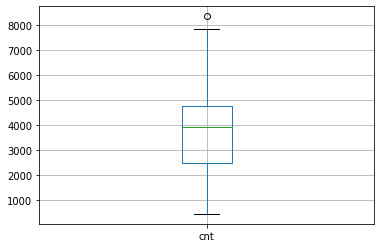

In [ ]:
dataset.boxplot(column=['cnt'])
plt.show()

In [ ]:
def replace_outlier_withIQR(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range,upper_range

In [ ]:
lowcnt,upcnt=replace_outlier_withIQR(dataset['cnt'])
dataset['cnt']=np.where(dataset['cnt']>upcnt,upcnt,dataset['cnt'])
dataset['cnt']=np.where(dataset['cnt']<lowcnt,lowcnt,dataset['cnt'])

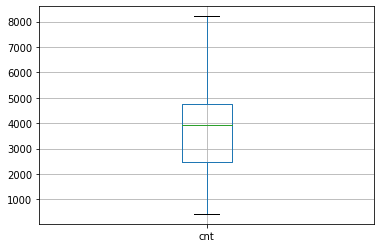

In [ ]:
dataset.boxplot(column=['cnt'])
plt.show()

In [ ]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,250.000000,2.206413,0.268537,5.515030,0.028056,2.995992,0.683367,1.408818,18.979325,22.316516,62.601307,13.212513,706.577154,3030.551102,3736.822144
std,144.193157,1.095573,0.443643,3.459066,0.165299,2.009012,0.465630,0.557175,7.350670,8.038017,15.282889,5.278390,612.099032,1194.650805,1537.593912
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,9.000000,416.000000,431.000000
25%,125.500000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,12.998189,15.843550,50.666050,9.313000,226.500000,2111.500000,2463.000000
50%,250.000000,2.000000,0.000000,5.000000,0.000000,3.000000,1.000000,1.000000,18.518347,22.222300,62.666700,12.707689,603.000000,3176.000000,3926.000000
75%,374.500000,3.000000,1.000000,8.000000,0.000000,5.000000,1.000000,2.000000,25.215000,28.725925,73.791650,16.083618,900.000000,3845.500000,4761.500000
max,499.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,34.815847,42.044800,97.250000,34.000021,3252.000000,5950.000000,8209.250000


In [ ]:
dataset.isnull().sum()
#median_col_name=dataset['col'].median()
#dataset['col'].replace(np.nan,median_col_name,inplace=True)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
duplicates=dataset.duplicated()
duplicates.sum()
#dataset.drop_duplicates(inplace=True)
#duplicates=dataset.duplicated()
#duplicates.sum()

0

In [ ]:
df_num = dataset[['temp','atemp','hum','windspeed','casual','registered','cnt']]
df_num.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331,654,985.0
1,14.902598,17.68695,69.6087,16.652113,131,670,801.0
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349.0
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562.0
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600.0


In [ ]:
df_num.corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.996325,0.184930,-0.132151,0.527648,0.525363,0.618083
atemp,0.996325,1.000000,0.195306,-0.157681,0.531608,0.537689,0.629237
hum,0.184930,0.195306,1.000000,-0.279102,-0.042922,-0.095201,-0.091144
windspeed,-0.132151,-0.157681,-0.279102,1.000000,-0.159212,-0.155970,-0.184358
casual,0.527648,0.531608,-0.042922,-0.159212,1.000000,0.386416,0.697745
registered,0.525363,0.537689,-0.095201,-0.155970,0.386416,1.000000,0.930311
cnt,0.618083,0.629237,-0.091144,-0.184358,0.697745,0.930311,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f966e97b290>,
      dtype=object)

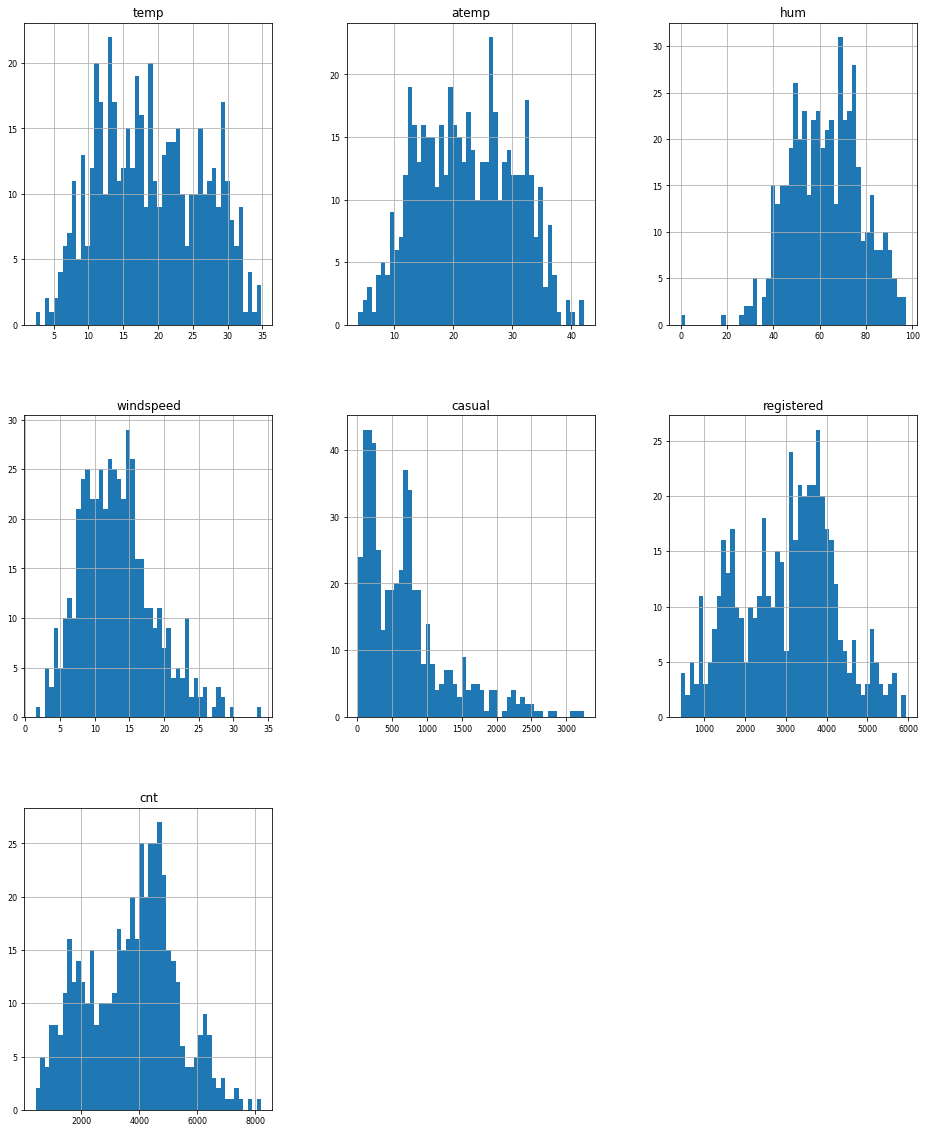

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
df_num_corr=df_num.corr()['cnt'][:-1]
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print(len(golden_features_list))
golden_features_list #Ask


4


registered    0.930311
casual        0.697745
atemp         0.629237
temp          0.618083
Name: cnt, dtype: float64

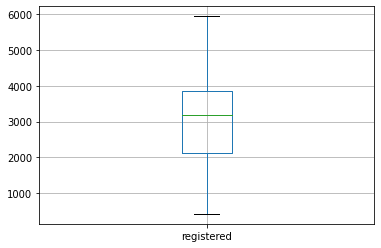

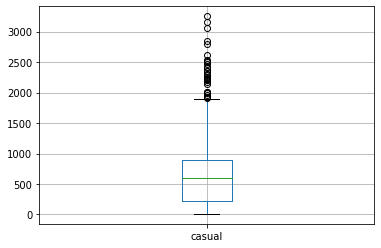

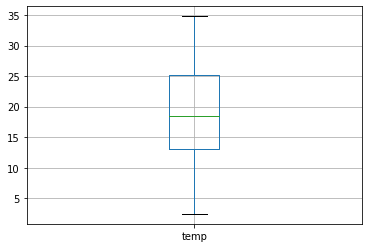

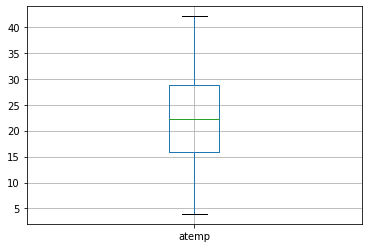

In [ ]:
dataset.boxplot(column=['registered'])
plt.show()
dataset.boxplot(column=['casual'])
plt.show()
dataset.boxplot(column=['temp'])
plt.show()
dataset.boxplot(column=['atemp'])
plt.show()



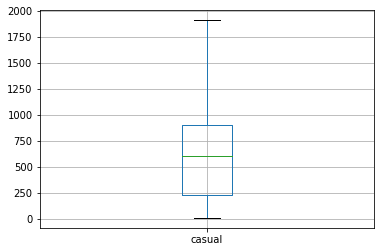

4


registered    0.930311
casual        0.706424
atemp         0.629237
temp          0.618083
Name: cnt, dtype: float64

In [ ]:
lowcnt,upcnt=replace_outlier_withIQR(dataset['casual'])
dataset['casual']=np.where(dataset['casual']>upcnt,upcnt,dataset['casual'])
dataset['casual']=np.where(dataset['casual']<lowcnt,lowcnt,dataset['casual'])
dataset.boxplot(column=['casual'])
plt.show()
#df_num = dataset.select_dtypes(include = ['float64', 'int64'])
df_num = dataset[['temp','atemp','hum','windspeed','casual','registered','cnt']]
df_num_corr=df_num.corr()['cnt'][:-1]
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print(len(golden_features_list))
golden_features_list

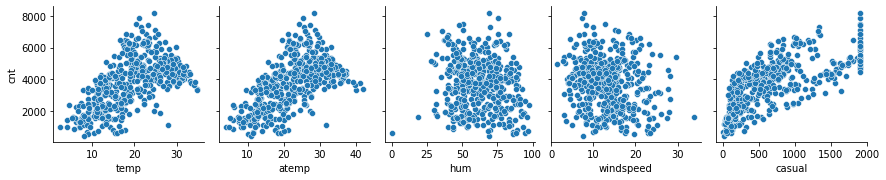

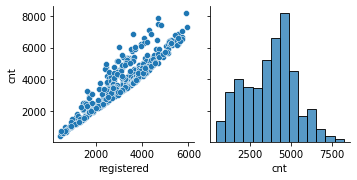

In [ ]:
import seaborn as sns
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['cnt'])


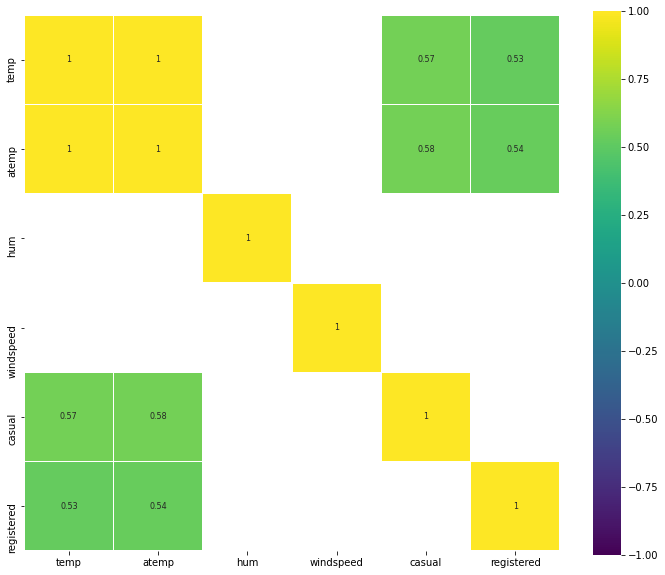

In [ ]:
corr = df_num.drop('cnt', axis=1).corr() # We already examined cnt correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [ ]:
df_categorical=dataset[['season','yr','mnth','holiday','weekday','workingday','weathersit','cnt']]
df_categorical.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,cnt
0,1,0,1,0,6,0,2,985.0
1,1,0,1,0,0,0,2,801.0
2,1,0,1,0,1,1,1,1349.0
3,1,0,1,0,2,1,1,1562.0
4,1,0,1,0,3,1,1,1600.0


In [ ]:
season_dic={1:'spring', 2:'summer', 3:'fall', 4:'winter'}
yr_dic={0:2018,1:2019}
mnth_dic={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
holiday_dic={0:'Not a holiday',1:'Holiday'}
weekday_dic={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
workingday_dic={0:'Working Day',1:'Not Working Day'}
weathersit_dic={1:'Clear',2:'Misty',3:'Light rain & snow',4:'Heavy rain and storm'}

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#df['Event'] = np.where((df.Event == 'Painting'),'Art',df.Event)
for i in list(season_dic.keys()):
  df_categorical.loc[(df_categorical.season==i),'season']=season_dic[i]
for i in list(yr_dic.keys()):
  df_categorical.loc[(df_categorical.yr==i),'yr']=yr_dic[i]
for i in list(mnth_dic.keys()):
  df_categorical.loc[(df_categorical.mnth==i),'mnth']=mnth_dic[i]
for i in list(holiday_dic.keys()):
  df_categorical.loc[(df_categorical.holiday==i),'holiday']=holiday_dic[i]
for i in list(weekday_dic.keys()):
  df_categorical.loc[(df_categorical.weekday==i),'weekday']=weekday_dic[i]
for i in list(workingday_dic.keys()):
  df_categorical.loc[(df_categorical.workingday==i),'workingday']=workingday_dic[i]
for i in list(weathersit_dic.keys()):
  df_categorical.loc[(df_categorical.weathersit==i),'weathersit']=weathersit_dic[i]
df_categorical.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,cnt
0,spring,2018,January,Not a holiday,Sunday,Working Day,Misty,985.0
1,spring,2018,January,Not a holiday,Monday,Working Day,Misty,801.0
2,spring,2018,January,Not a holiday,Tuesday,Not Working Day,Clear,1349.0
3,spring,2018,January,Not a holiday,Wednesday,Not Working Day,Clear,1562.0
4,spring,2018,January,Not a holiday,Thursday,Not Working Day,Clear,1600.0


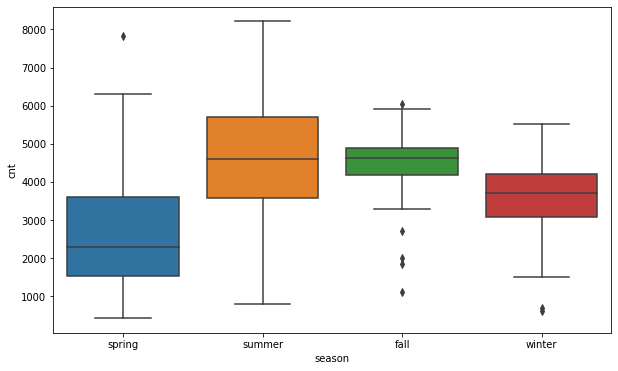

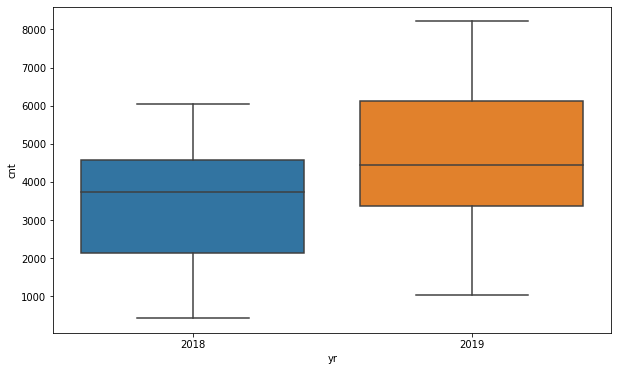

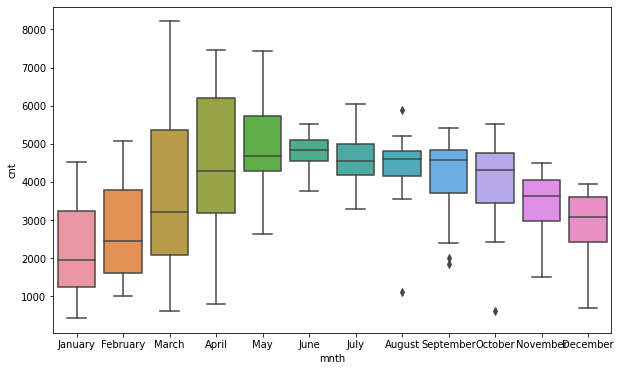

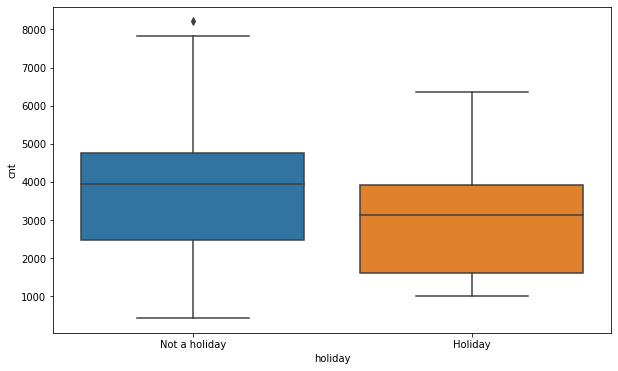

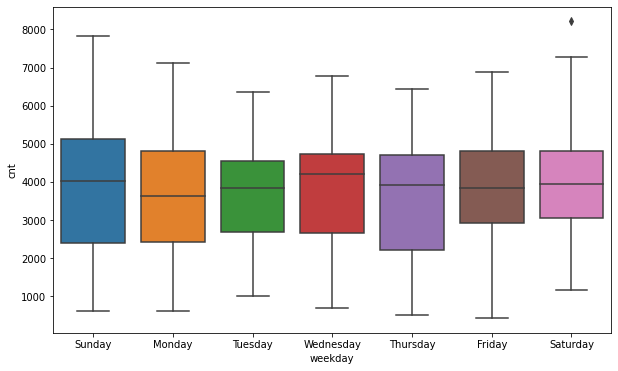

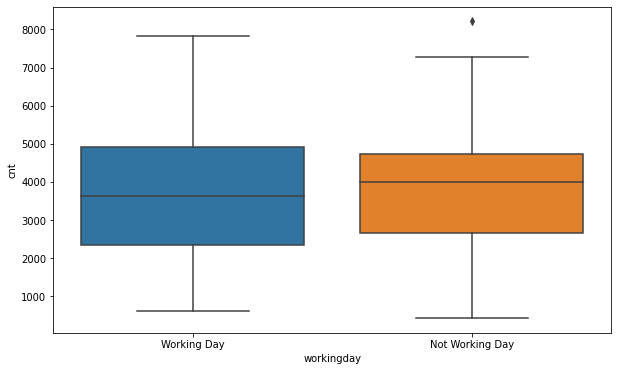

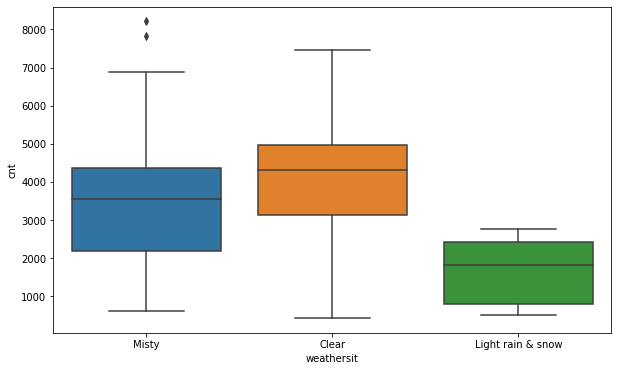

In [ ]:
#sns.boxplot(x='season', y='cnt', data=df_categorical)
columns=list(df_categorical.columns)
columns.remove('cnt')
for i in columns :
  plt.figure(figsize = (10, 6))
  sns.boxplot(x=i,y='cnt',data=df_categorical)
  plt.show()

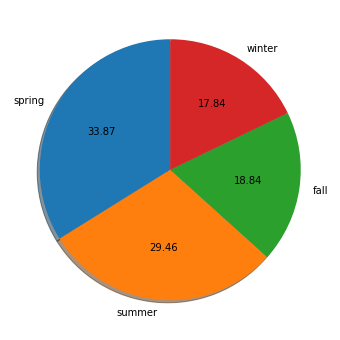

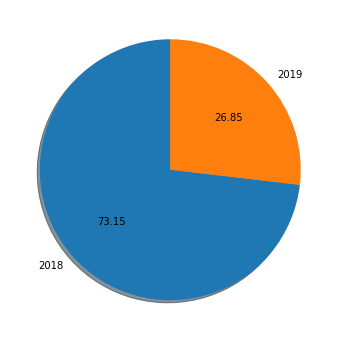

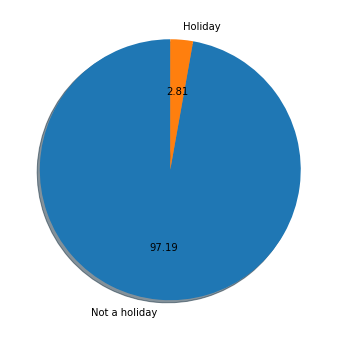

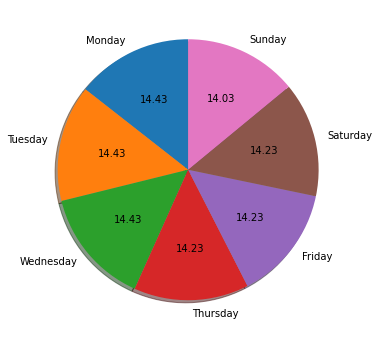

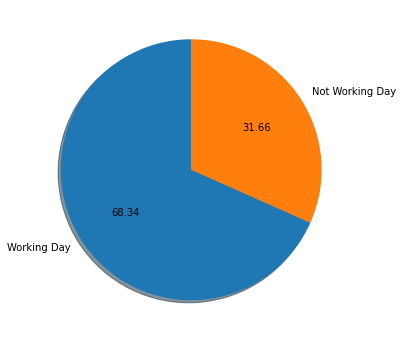

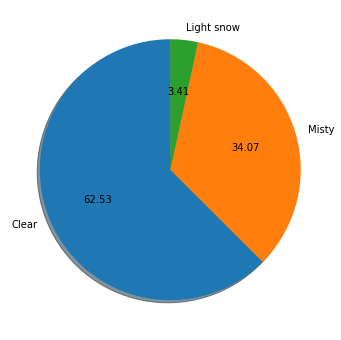

In [ ]:
plt.figure(figsize = (10, 6))
plt.pie(x=df_categorical['season'].value_counts(),shadow=True,labels=list(season_dic.values()),startangle=90,autopct="%.2f");
plt.show()
plt.figure(figsize = (10, 6))
plt.pie(x=df_categorical['yr'].value_counts(),shadow=True,labels=list(yr_dic.values()),startangle=90,autopct="%.2f");
plt.show()
plt.figure(figsize = (10, 6))
plt.pie(x=df_categorical['holiday'].value_counts(),shadow=True,labels=list(holiday_dic.values()),startangle=90,autopct="%.2f");
plt.show()
plt.figure(figsize = (10, 6))
plt.pie(x=df_categorical['weekday'].value_counts(),shadow=True,labels=list(weekday_dic.values()),startangle=90,autopct="%.2f");
plt.show()
plt.figure(figsize = (10, 6))
plt.pie(x=df_categorical['workingday'].value_counts(),shadow=True,labels=list(workingday_dic.values()),startangle=90,autopct="%.2f");
plt.show()
plt.figure(figsize = (10, 6))
plt.pie(x=df_categorical['weathersit'].value_counts(),labels=['Clear','Misty','Light snow'],shadow=True,startangle=90,autopct="%.2f");
plt.show()

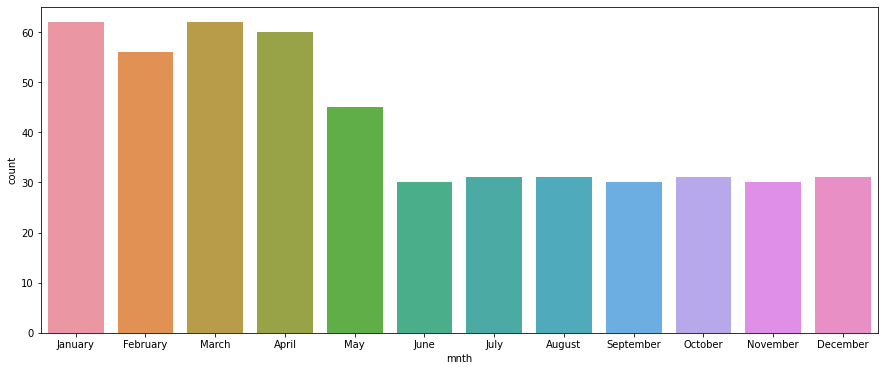

In [ ]:
plt.figure(figsize = (15, 6))
sns.countplot(x=df_categorical['mnth'], data=df_categorical);

In [ ]:
pd.crosstab(df_categorical.season,df_categorical.cnt)

cnt,431.00,506.00,605.00,623.00,627.00,683.00,705.00,754.00,795.00,801.00,822.00,959.00,981.00,985.00,986.00,1000.00,1005.00,1011.00,1027.00,1096.00,1098.00,1107.00,1115.00,1162.00,1167.00,1204.00,1248.00,1263.00,1301.00,1317.00,1321.00,1349.00,1360.00,1406.00,1416.00,1421.00,1446.00,1450.00,1461.00,1471.00,...,5923.00,5936.00,6041.00,6043.00,6093.00,6118.00,6133.00,6153.00,6169.00,6192.00,6196.00,6230.00,6233.00,6235.00,6273.00,6296.00,6304.00,6312.00,6359.00,6370.00,6398.00,6421.00,6436.00,6457.00,6460.00,6565.00,6572.00,6624.00,6691.00,6772.00,6857.00,6871.00,6883.00,7030.00,7132.00,7290.00,7429.00,7460.00,7836.00,8209.25
season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
fall,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
spring,1,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
summer,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,1,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
winter,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.crosstab(df_categorical.season,df_categorical.yr)

yr,2018,2019
season,,
fall,94,0
spring,90,79
summer,92,55
winter,89,0


In [ ]:
import scipy.stats as ss
#Ask about chi-square conditions 80% of cells mustve expected frequency of 5 and no cell mustve expected frequency<3

In [ ]:
def Cramers_V(x,y,bias_correction=True):
  '''x,y are series objects or numpy arrays (1D)
  0=no relationship
  <=0.2=weak
  <=0.3=moderate
  >0.3= strong'''

  confusion_matrix=pd.crosstab(x,y)
  chi2=ss.chi2_contingency(confusion_matrix)[0]
  n=confusion_matrix.sum().sum()
  phi2=chi2/n
  r,c=confusion_matrix.shape
  if(bias_correction):
    phi2corr=max(0,phi2-((c-1)*(r-1))/(n-1))
    rcorr=r-((r-1)**2/(n-1))
    ccorr=c-((c-1)**2/(n-1))
    return np.sqrt(phi2corr/min((ccorr-1),(rcorr-1)))
  else:
    return np.sqrt(phi2/min((r-1),(c-1)))
    




In [ ]:
columns=list(df_categorical.columns)
Cramers_corr=np.zeros((len(columns)-1,len(columns)-1))
for i in range(len(columns)-1):
  for j in range(len(columns)-1):
    Cramers_corr[i][j]=Cramers_V(df_categorical[columns[i]],df_categorical[columns[j]])
columns.remove('cnt')
categorical_corr=pd.DataFrame(Cramers_corr,columns=columns,index=columns)





In [ ]:
categorical_corr

,season,yr,mnth,holiday,weekday,workingday,weathersit
season,1.000000,0.462596,0.894674,0.000000,0.000000,0.000000,0.093445
yr,0.462596,0.994889,0.517599,0.000000,0.000000,0.000000,0.010047
mnth,0.894674,0.517599,1.000000,0.000000,0.000000,0.000000,0.124821
holiday,0.000000,0.000000,0.000000,0.963179,0.296551,0.232504,0.000000
weekday,0.000000,0.000000,0.000000,0.296551,1.000000,0.936090,0.037773
workingday,0.000000,0.000000,0.000000,0.232504,0.936090,0.995360,0.000000
weathersit,0.093445,0.010047,0.124821,0.000000,0.037773,0.000000,1.000000


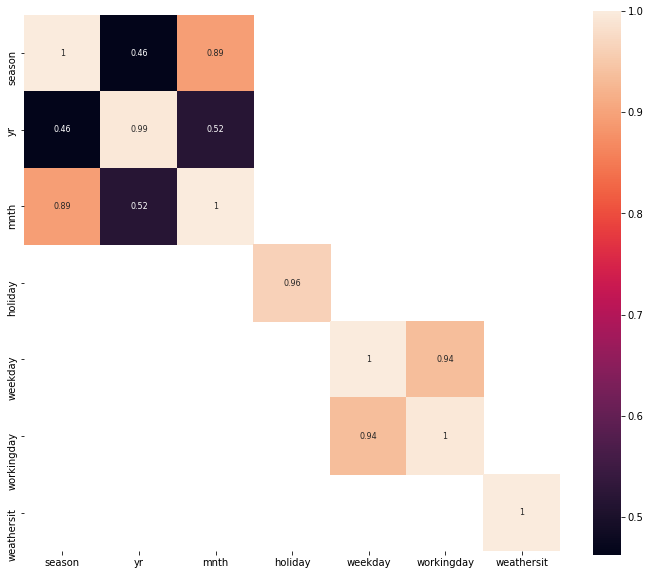

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(categorical_corr[categorical_corr>=0.3],annot=True, annot_kws={"size": 8}, square=True);